In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as datetime
import matplotlib.pyplot as plt
import plotly.express as px


import re  # regex

from bs4 import BeautifulSoup

import nltk
import nltk.corpus
from nltk.corpus import stopwords

#nltk.download()

from nltk.tokenize import word_tokenize
#from nltk import word_tokenize
nltk.download('punkt')

import string
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet

from wordcloud import WordCloud, STOPWORDS
import collections

from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")
plt.style.use('default')
import squarify

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\godwi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\godwi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [3]:
name = pd.read_csv("../web_scrap_database/inf2.csv")
name.shape

(180003, 7)

In [4]:
name.drop_duplicates(subset = 'Tweet', keep = 'first', inplace = True)

In [5]:
name['Date Created'] = pd.to_datetime(name['Date Created'])

In [6]:
name['year'] = pd.DatetimeIndex(name['Date Created']).year.astype('str')
name['month'] = pd.DatetimeIndex(name['Date Created']).month.astype('str')
name['day'] = pd.DatetimeIndex(name['Date Created']).day.astype('str')

name['date'] =  name['year'] + '-' + name['month'] + '-' + name['day']
name['date'] = pd.to_datetime(name['date'])

In [7]:
name = name.drop(['User_name','Number of Likes',"year","month","day"], axis =1)


In [8]:
# #cleaning the tweets  tHIS ONE REMOVES or strips THE dupliate twitter hash tags e.g @ john @ timi, retains emorji , but makes space \n

# def remove_pattern(input_txt, pattern):
#     r = re.findall(pattern, input_txt)
#     for i in r:
#         input_txt = re.sub(i, '', input_txt)        
#     return input_txt
# def clean_tweets(tweets):
#     #remove twitter Return handles (RT @xxx:)
#     tweets = np.vectorize(remove_pattern)(tweets, "RT @[\w]*:") 
    
#     #remove twitter handles (@xxx)
#     tweets = np.vectorize(remove_pattern)(tweets, "@[\w]*")
    
#     #remove URL links (httpxxx)
#     tweets = np.vectorize(remove_pattern)(tweets, "https?://[A-Za-z0-9./]*")
    
#     #remove special characters, numbers, punctuations (except for #)
#     tweets = np.core.defchararray.replace(tweets, "[^a-zA-Z]", " ")
    
#     #remove new line
#     tweets = np.vectorize(remove_pattern)(tweets, "https?://[A-Za-z0-9./]*")
    
#     return tweets


# name['tweet_preprocessed'] = name.Tweet.apply(lambda x :clean_tweets(x) )

In [9]:
import re
def clean_tweets(text):
  text = re.sub("RT @[\w]*:","",text)
  text = re.sub("@[\w]*","",text)
  text = re.sub("https?://[A-Za-z0-9./]*","",text)
  text = re.sub("\n","",text)
  return text
name['tweet_preprocessed'] = name.Tweet.apply(lambda x :clean_tweets(x) )

In [10]:
# # stopword remover and preprocessing  channges emorji to lol also strip multiple hash tags

# stopwords = set(stopwords.words("english"))
# def clean_tweet(tweet):
#     if type(tweet) == np.float:
#         return ""
#     temp = tweet.lower()
#     temp = re.sub("'", "", temp) # to avoid removing contractions in english
#     temp = re.sub("@[A-Za-z0-9_]+","", temp)
#     temp = re.sub("#[A-Za-z0-9_]+","", temp)
#     temp = re.sub(r'http\S+', '', temp)
#     temp = re.sub('[()!?]', ' ', temp)
#     temp = re.sub('\[.*?\]',' ', temp)
#     temp = re.sub("[^a-z0-9]"," ", temp)
#     temp = temp.split()
#     temp = [w for w in temp if not w in stopwords]
#     temp = " ".join(word for word in temp)
#     return temp
# name['tweet_preprocessed'] = name.Tweet.apply(lambda x :clean_tweet(x) )

In [11]:
# removes only @ from hash tags and converts emoji to lol

# def clean_lemmatize_token(tweet):
#     stop_words = set(stopwords.words('english'))
    
#     cleaned = tweet.translate(str.maketrans('', '', string.punctuation)).lower()
#     tokenized = word_tokenize(cleaned)
#     filtered = [w for w in tokenized if not w in stop_words]
#     lemmatizer = WordNetLemmatizer()
#     lemmatized = []
#     for word in filtered:
#         lemmatized.append(lemmatizer.lemmatize(word))
#     to_remove = ['rt','mention','sxsw','link',"RT @[\w]*:"]
#     lemmatized = [w for w in lemmatized if w not in to_remove]
#     lemmatized = ' '.join(lemmatized)
#     return lemmatized

# name['tweet_preprocessed'] = name.Tweet.apply(lambda x :clean_lemmatize_token(x) )



In [12]:
#Use with TFIDF 

# from nltk.tokenize import WordPunctTokenizer
# tok = WordPunctTokenizer()
# # pat1 = r'@[A-Za-z0-9]+'
# # pat2 = r'https?://[A-Za-z0-9./]+'
# # combined_pat = r'|'.join((pat1, pat2))

# def tweet_cleaner(text):
#     # soup = BeautifulSoup(text, 'lxml')
#     # souped = soup.get_text()
#     # stripped = re.sub(combined_pat, '', souped)
#     # try:
#     #     clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
#     # except:
#     #     clean = stripped
#     # letters_only = re.sub("[^a-zA-Z]", " ", clean)
#     # lower_case = letters_only.lower()
#     # During the letters_only process two lines above, it has created unnecessay white spaces,
#     # I will tokenize and join together to remove unneccessary white spaces
#     words = tok.tokenize(lower_case)
#     return (" ".join(words)).strip()

In [13]:
#Use with TFIDF 
# # Tokenization
# tk = word_tokenize
# df['Tweet'].apply(tk)

In [14]:
#Use with TFIDF 
# stop_words = set(stopwords.words('english'))

# def cleaning_stopwords(text):
#     return " ".join([word for word in str(text).split() if word not in stop_words])

# df['tweet_stopword'] = df['Tweet'].apply(lambda x:cleaning_stopwords(x) )
# df.head()

In [15]:
name.head()

,location,Date Created,Source of Tweet,Tweet,name,date,tweet_preprocessed
0,"Kano, Nigeria",2022-08-26 23:59:50+00:00,Twitter for Android,"@renoomokri Truth be told, if you go through a...",Obi,2022-08-26,"Truth be told, if you go through all Reno twe..."
1,On Exile,2022-08-26 23:59:44+00:00,Twitter for Android,@fkeyamo Senior Advocate of Nonsense and Fake ...,Obi,2022-08-26,Senior Advocate of Nonsense and Fake News
2,NaN,2022-08-26 23:59:36+00:00,Twitter for iPhone,@Emma_Obaseki @ctsar_ct @jhonoguyng @Jujufores...,Obi,2022-08-26,Lol. Ok
3,"Enugu, Nigeria",2022-08-26 23:59:28+00:00,Twitter for Android,@Lagbajaomotamed @AdebowaleShogb3 @PeterObi Om...,Obi,2022-08-26,Omo Anambra and Imo state respectively rank...
4,NaN,2022-08-26 23:59:23+00:00,Twitter for Android,@taajoowolabi @renoomokri You like it or not P...,Obi,2022-08-26,You like it or not PDP and APC time is over ...


In [16]:
name.drop(name[name.tweet_preprocessed == ''].index,inplace = True)

In [17]:
name.date.value_counts()

2022-08-24    44227
2022-08-26    41223
2022-08-25    40642
2022-08-23    26202
2022-08-22    12591
Name: date, dtype: int64

# VADER FOR SENTIMENT

In [18]:
sentiments = SentimentIntensityAnalyzer()
name['Positive'] = name['Tweet'].apply(lambda x: sentiments.polarity_scores(x)['pos'])
name['Negative'] = name['Tweet'].apply(lambda x: sentiments.polarity_scores(x)['neu'])
name['Neutral'] = name['Tweet'].apply(lambda x: sentiments.polarity_scores(x)['neg'])
name['compound'] = name['Tweet'].apply(lambda x: sentiments.polarity_scores(x)['compound'])

In [19]:
score = name.compound.values
sentiment = []
for i in score:
    if i >=0.05 :
        sentiment.append('positive')
    elif i <= -0.05:
        sentiment.append('negative')
    else:
        sentiment.append('neutral')

In [20]:
name['sentiment']= sentiment

In [21]:
name['sentiment'] = sentiment
tweet_final = name.loc[:,['tweet_preprocessed','sentiment',"name"]]
tweet_final

,tweet_preprocessed,sentiment,name
0,"Truth be told, if you go through all Reno twe...",positive,Obi
1,Senior Advocate of Nonsense and Fake News,negative,Obi
2,Lol. Ok,positive,Obi
3,Omo Anambra and Imo state respectively rank...,positive,Obi
4,You like it or not PDP and APC time is over ...,positive,Obi
...,...,...,...
179998,Good morning 🌄We should concern ourselves...,negative,Tinubu
179999,"Very unwise statement to say, if his the stra...",negative,Tinubu
180000,,neutral,Tinubu
180001,This is not suppose to be an economic summi...,negative,Tinubu


In [22]:
tweet_final.sentiment.value_counts().to_frame()

,sentiment
positive,66520
neutral,53197
negative,45168


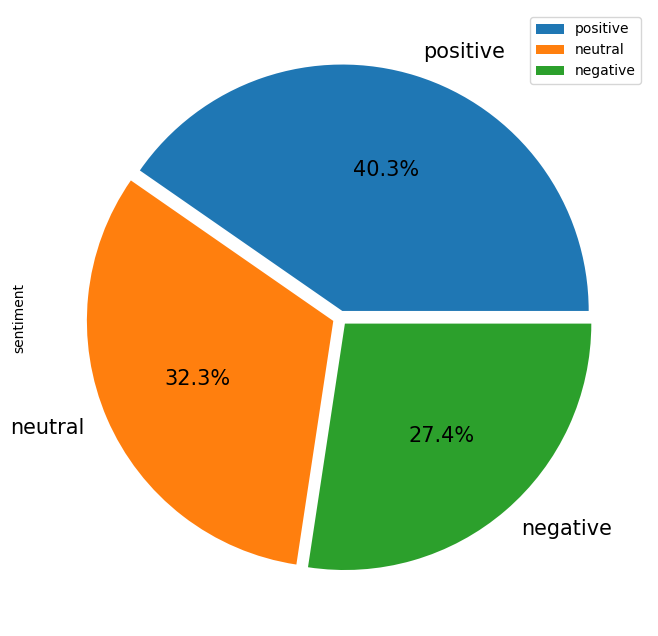

In [23]:
fig,ax = plt.subplots(figsize = (10,8))
tweet_final.sentiment.value_counts().plot(kind = 'pie',autopct='%1.1f%%',explode=[0.03,0.03,0.03],textprops={'fontsize': 15})
ax.legend()

In [24]:
tweet_final.sentiment.value_counts().to_frame()

,sentiment
positive,66520
neutral,53197
negative,45168


<AxesSubplot:ylabel='sentiment'>

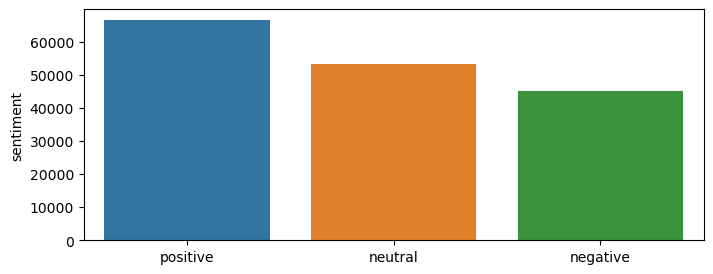

In [25]:
fig,ax = plt.subplots(figsize = (8,3))
sns.barplot(data = tweet_final.sentiment.value_counts().to_frame(), y = tweet_final.sentiment.value_counts().to_frame().sentiment,\
    x =tweet_final.sentiment.value_counts().to_frame().index)

In [26]:
tweet_final['sentiment_encoded'] = tweet_final.sentiment.apply(lambda x: 1 if x == 'positive' else -1 if x == 'negative' else 0)

In [27]:
tweet_final.loc[:, ["tweet_preprocessed", "sentiment","name"]][(tweet_final.loc[:, ["tweet_preprocessed", "sentiment","name"]].name == 'obi') & \
(tweet_final.loc[:, ["tweet_preprocessed", "sentiment","name"]].sentiment=="positive")]

,tweet_preprocessed,sentiment,name


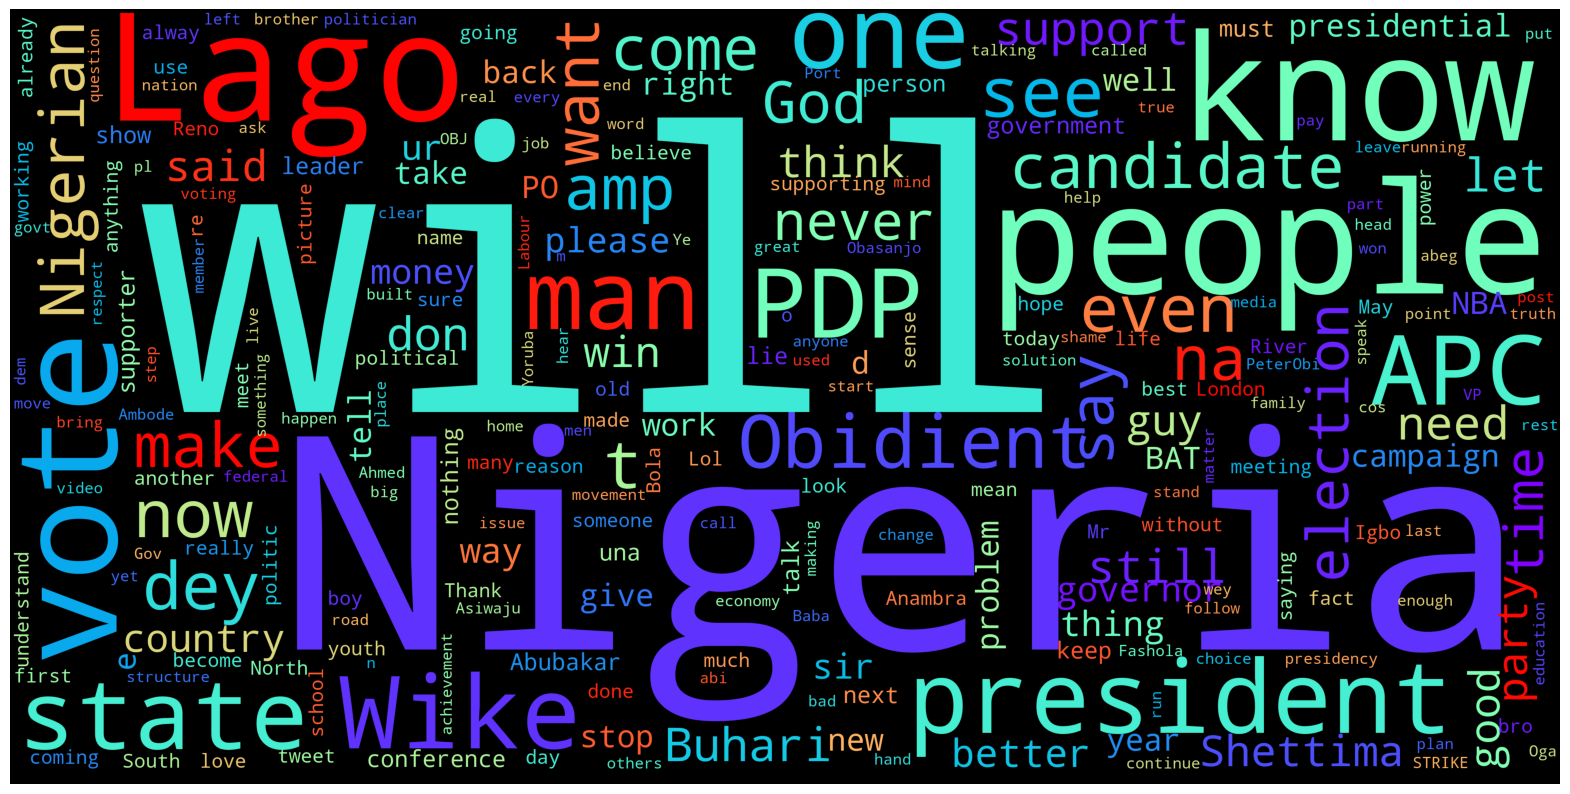

In [43]:
import collections

stopwords = STOPWORDS
stopwords.update(["https", "co","I","The","s","u","go","us","obi","Tinubu","atiku","peter"])


text = "".join(tweet_final.tweet_preprocessed)
fig, ax = plt.subplots(figsize = (20,20))
wc = WordCloud(stopwords=stopwords, max_words = 1000 , collocations=False , max_font_size=100, scale=10,\
    relative_scaling=.6, background_color="black", colormap = "rainbow", random_state=3).generate(text)
plt.axis("off")
ax.imshow(wc);

# tweet_final.loc[:, ["tweet_preprocessed", "sentiment","name"]]\
#     [(tweet_final.loc[:, ["tweet_preprocessed", "sentiment","name"]].name == 'Tinubu') & \
# (tweet_final.loc[:, ["tweet_preprocessed", "sentiment","name"]].sentiment=="negative")].tweet_preprocessed

In [29]:
filtered_words = [word for word in text.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)

In [30]:
popular = pd.DataFrame(counted_words, index =[0]).T.reset_index().rename({"index":"word"},axis =1)\
    .rename({0 :"count"},axis =1).groupby("word").sum().sort_values("count",ascending= False)[:10]

In [31]:
popular

,count
word,
Atiku,28294
will,26960
Obi,13957
Nigeria,10853
Peter,10699
You,9481
people,9389
know,8806
one,7577


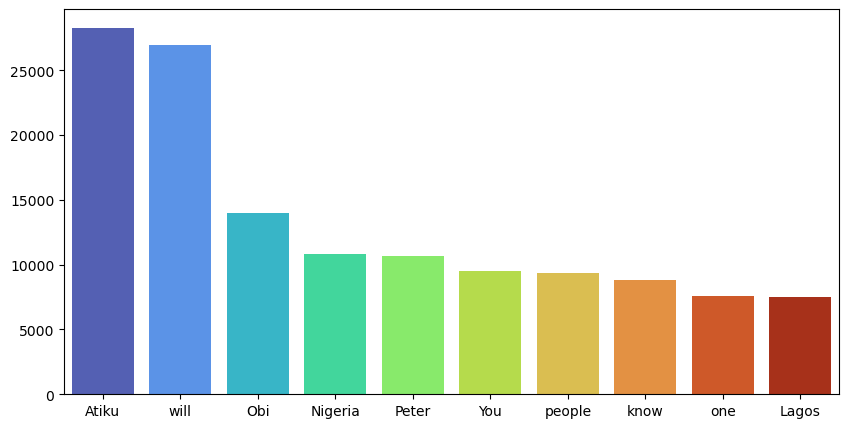

In [32]:
fig,ax =plt.subplots(figsize = (10,5))
sns.barplot(x = words, y = counts, palette= 'turbo')
plt.show()

<AxesSubplot:ylabel='Source of Tweet'>

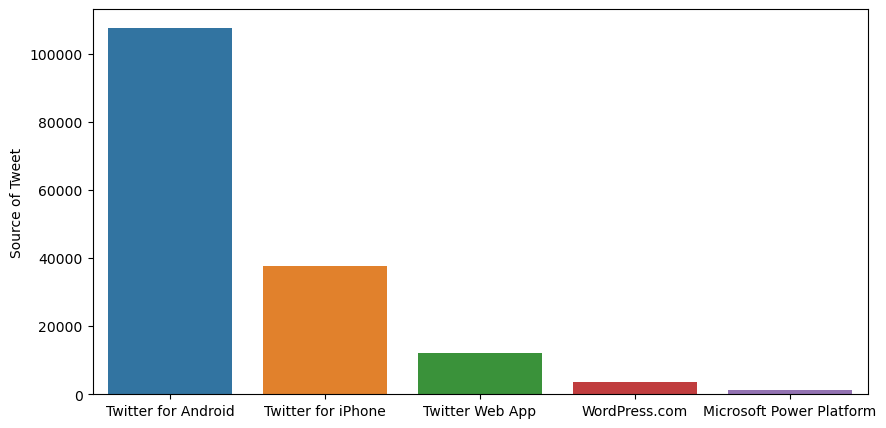

In [33]:
tweet_platform = name['Source of Tweet'].value_counts().head(5).to_frame()
fig,ax =plt.subplots(figsize = (10,5))
sns.barplot( data = tweet_platform,  x = tweet_platform.index,  y = tweet_platform["Source of Tweet"])

In [34]:
tweet_platform

,Source of Tweet
Twitter for Android,107779
Twitter for iPhone,37802
Twitter Web App,12234
WordPress.com,3629
Microsoft Power Platform,1112


In [35]:
sent_tab = pd.crosstab(name.name, name.sentiment).transpose()
fig = px.bar(sent_tab,barmode='group',text_auto=True)
fig.update_layout(width=1000,    height=500, title = 'Social Media Sentiments',title_x=0.5)
fig.update_traces(textposition='outside',textfont_size=11)
fig.show()


In [36]:
sent_tab

name,Atiku,Obi,Tinubu
sentiment,,,
negative,16261,13886,15021
neutral,16969,21146,15082
positive,23467,23787,19266


In [37]:
fig=px.pie(sent_tab.Tinubu, names = sent_tab.Tinubu.index, values = sent_tab.Tinubu.values,hole=.5)
fig.update_traces(textposition='outside', textinfo='percent+label',textfont_size=15)
fig.update_layout(autosize=False,title_text = "Negative Sentiments", )
fig.show()

In [38]:
sent_tab.to_csv("crosstab_sent.csv")

In [42]:
name.to_csv("influencers.csv", index = False)

In [39]:
fig =px.pie(pos_sent,names=pos_sent.index,values=pos_sent.sentiment,hole=.5)
fig.update_traces(textposition='outside', textinfo='percent+label',textfont_size=15)
fig.update_layout(autosize=False,title = "Positive Sentiments",)

fig.show()

NameError: name 'pos_sent' is not defined

In [ ]:
fig=px.bar(name[name.name== 'atiku']['sentiment'].value_counts())
fig.update_layout(width=700,    title = 'Social Media Sentiments')
fig.update_traces(textposition='inside',textfont_size=11)
fig.show()

# Perform cluster of variuos twitter users

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
name_vec = name.iloc[:, [6,11]]
name_vec

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [40]:
name_vec['sentiment_encode'] = name_vec['sentiment'].apply(lambda x: -1 if x == 'negative' else 0 if x == 'neutral' else 1 )

NameError: name 'name_vec' is not defined

In [ ]:
name_vec

In [ ]:
ppvectorizer = TfidfVectorizer(use_idf=True,stop_words='english')
X = name_vec.tweet_preprocessed
y = name_vec.sentiment

In [ ]:
X = vectorizer.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.base import TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
# from sklearn.naive_bayes import MultinomialNB


# clf = RandomForestClassifier(random_state=42, n_estimators=50)
lr = LogisticRegression(max_iter=3000, random_state=42, n_jobs=-1)
kn = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
sgd = SGDClassifier(random_state=42, n_jobs=-1)
# nb = MultinomialNB(alpha=0.02)



models = { "LogisticRegression" : lr,
         "KNeighborsClassifier": kn,
         "SGDClassifier": sgd
        #  "GaussianNB" :nb
         }

for model in models.keys():
    scores = cross_val_score(models[model], X, y, cv=5)
    
    print('model:' ,model)
    print('score:', scores)
    print('mean:' ,scores.mean())
    models[model].fit(X_train, y_train)
    print("accuracy_score:", (models[model].score(X_test, y_test)))
    print("training score:", (models[model].score(X_train, y_train)))
    print()


# Hypertuning 

In [ ]:
from sklearn.model_selection import GridSearchCV
# defining parameter range 
param_grid = {"solver": [ 'lbfgs', 'liblinear'],
              "C" :[100, 20, 10, 1.0, 0.1, 0.01],
              "penalty" :['l2']
              }  
   
grid = GridSearchCV(lr, param_grid, refit = True, verbose = 3,n_jobs=-1,cv=5) 
   
# fitting the model for grid search 
grid.fit(X_train, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_test) 


In [ ]:
confusion_matrix(y_test, grid_predictions)

In [ ]:
y_pred = lr.predict(X_test)
y_pred_probab = grid.predict_proba(X_test)

In [ ]:
accuracy_score(y_test, grid_predictions)

In [ ]:
print(classification_report(y_test, grid_predictions))

In [ ]:
cm  = confusion_matrix(y_test, grid_predictions)
cm = pd.DataFrame(cm)
cm

In [ ]:
plt.subplots(figsize = (13,5))
sns.heatmap(cm, annot=True,fmt='g')

In [ ]:
import scikitplot as skplt
fig, ax = plt.subplots(figsize=(14,7))
skplt.metrics.plot_roc(y_test, y_pred_probab,ax= ax)